In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
!rm -rf <rgb>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `rm -rf <rgb>'


In [ ]:
cap = cv2.VideoCapture('/content/DataExample.mp4')
num_frames = 95
count = 0

while cap.isOpened() and count < num_frames:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(f'frame{count}.jpg', frame)
    count += 1
cap.release()

Enter the frame number: 62


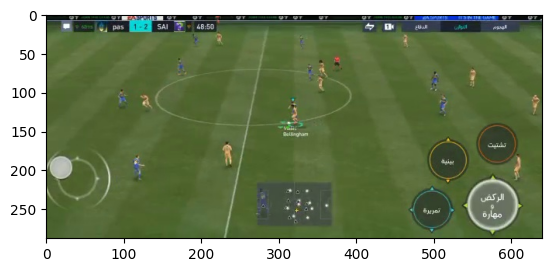

In [ ]:

frame_num = input('Enter the frame number: ')


img = cv2.imread(f'frame{frame_num}.jpg')
plt.imshow(img)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

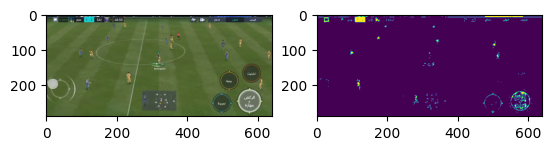

In [ ]:
#blue
lower = 0, 0, 100
upper = 120, 255,255
mask = cv2.inRange(img2, lower, upper)
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

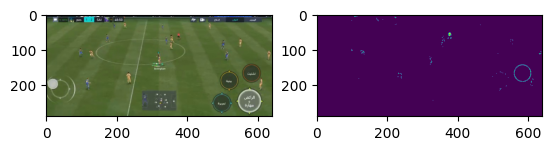

In [ ]:
#yellow
lower = 100, 0, 0
upper = 255, 100 ,255
mask = cv2.inRange(img2, lower, upper)
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

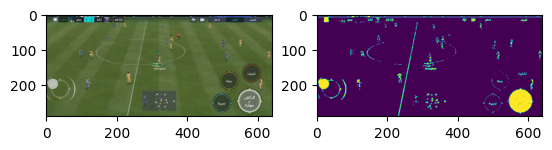

In [ ]:
#the middle circle and 18 yard circle
lower = 90,90,90
upper = 255,255,255
mask = cv2.inRange(img2, lower, upper)
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

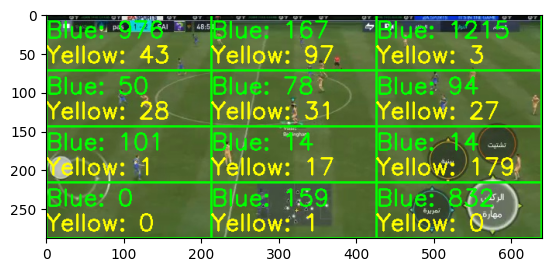

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(f'frame{frame_num}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blue_lower = np.array([0, 0, 100])
blue_upper = np.array([120, 255, 255])
yellow_lower = np.array([100, 0, 0])
yellow_upper = np.array([255, 100, 255])


blue_mask = cv2.inRange(img, blue_lower, blue_upper)
yellow_mask = cv2.inRange(img, yellow_lower, yellow_upper)


rows = 4
cols = 3
grid_height = img.shape[0] // rows
grid_width = img.shape[1] // cols


blue_counts = []
yellow_counts = []


for i in range(rows):
    for j in range(cols):

        top = i*grid_height
        bottom = (i+1)*grid_height
        left = j*grid_width
        right = (j+1)*grid_width


        blue_grid = blue_mask[top:bottom, left:right]
        yellow_grid = yellow_mask[top:bottom, left:right]


        blue_count = cv2.countNonZero(blue_grid)
        yellow_count = cv2.countNonZero(yellow_grid)


        blue_counts.append(blue_count)
        yellow_counts.append(yellow_count)


        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(img, f'Blue: {blue_count}', (left, top + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(img, f'Yellow: {yellow_count}', (left, bottom - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)


plt.imshow(img)
plt.show()